# 期末报告-探究多种ML方法在MNIST数据集上的分类和生成
**数学与应用数学21-1 凌梓南 2021211589**

## 1 摘要
本实验报告旨在探究多种ML方法在手写数字数据集（MNIST）上的分类识别和生成的效果。报告主要分为两个部分，第一部分作者探究了分别使用Random Forest、SVM、MLP和CNN四种机器学习（深度学习）方法在MNIST数据集上对手写数字进行分类识别的实现与评估。第二部分中，作者基于Diffusion模型中的Ho等人提出的**DDPM**方法[[1]]，使用Peebles等人于2022年提出的**DiT**[[2]]作为骨干网络，借助MNIST数据集训练了一个Conditional Diffusion模型，实现可以通过输入数字来生成对应的手写数字（*这部分内容为作者正在参与的科研项目中的部分内容之一，为自主探索内容*）。</br>


本篇报告的全部内容与源码作者已发布在GitHub个人仓库：

[1]: https://arxiv.org/abs/2006.11239 "Denoising Diffusion Probabilistic Models"
[2]: https://arxiv.org/abs/2212.09748 "Scalable Diffusion Models with Transformers"

## 2 MNIST数据集介绍

MNIST是一个手写体数字的图片数据集，该数据集来由美国国家标准与技术研究所（National Institute of Standards and Technology (NIST)）发起整理，一共统计了来自250个不同的人手写数字图片，其中50%是高中生，50%来自人口普查局的工作人员。该数据集的收集目的是希望通过算法，实现对手写数字的识别。(本段介绍参考CSDN文章：[Mnist数据集简介](https://blog.csdn.net/tony_vip/article/details/118735261))

图片来自维基百科：
![image.png](img/MnistExamples.png)


## 3 MNIST手写数字数据集分类识别

本节中，作者使用Random Forest, SVM, MLP和CNN四种方法对手写数字数据集进行分类识别，其中Random Forest和SVM方法使用`skit-learn`库进行实现，而MLP和CNN方法则使用Meta的`PyTorch`框架进行构造实现。

### 3.1 MNIST数字识别-SVM实现

在本小节中，作者使用使用`sklearn`库中的`datasets`模块直接读取内置在工具包中的MNIST数据集，然后进行8:2的训练集-测试集划分。通过`SVM`模型拟合labels，最终在测试集上借助`metrics`模块中的`classification_report`和混淆矩阵`confusion_matrix`评估结果，同时可视化了部分测试的结果。

从结果中可以看出SVM方法在随机划分的测试集上取得了**94%**的准确率。

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       0.96      0.73      0.83        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.92      0.97      0.95        36
           8       0.78      0.94      0.85        33
           9       0.92      0.89      0.90        37

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360

Confusion Matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 27  0  2  0  2  6  0]
 [ 0  0  0  0 34  0  0  0  1  2]
 [ 0  0  0  0  0 37  0  0  0  0]
 [

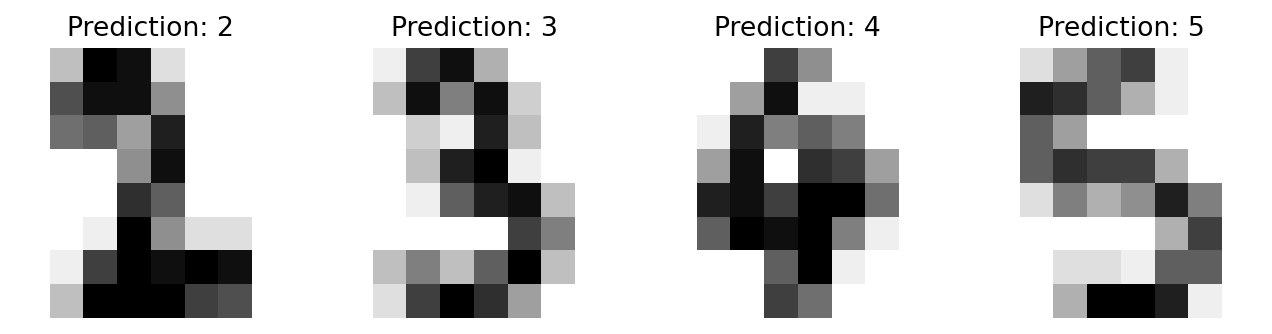

In [29]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

digits = datasets.load_digits()

X = digits.images
y = digits.target

n_samples = len(X)
X = X.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

svm_predicted = svm_model.predict(X_test)

#-----------------------验证阶段(直接写成函数方便后面RF复用)-----------------------#
def test_report(predicted, visual=True):
    print("Classification Report:")
    print(metrics.classification_report(y_test, predicted))

    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, predicted))
    
    if visual:
        _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3), dpi=160)
        for ax, image, prediction in zip(axes, X_test, predicted):
            ax.set_axis_off()
            image = image.reshape(8, 8)
            ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
            ax.set_title(f'Prediction: {prediction}')

        plt.show()

test_report(svm_predicted)

### 3.2 MNIST数字识别-Random Forest实现

本小节中，作者更换骨干模型，使用随机森林作为分类器，数据和验证部分则复用上面SVM部分写好的代码。为了使报告简洁，作者在这一小节不再可视化最终的预测结果。

经过测试发现，Random Forest在该数据集上的测试准确率为**93%**，不如SVM方法。

In [33]:
from sklearn.ensemble import RandomForestClassifier as RFC

rfc_model = RFC()
rfc_model.fit(X_train, y_train)

rfc_predicted = rfc_model.predict(X_test)

test_report(rfc_predicted, visual=False)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.90      0.97      0.93        36
           2       1.00      0.97      0.99        35
           3       0.96      0.70      0.81        37
           4       0.94      0.92      0.93        37
           5       0.88      1.00      0.94        37
           6       1.00      1.00      1.00        37
           7       0.88      0.97      0.92        36
           8       0.81      0.91      0.86        33
           9       0.97      0.86      0.91        37

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360

Confusion Matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  1]
 [ 1  0 34  0  0  0  0  0  0  0]
 [ 0  1  0 26  0  3  0  1  6  0]
 [ 0  0  0  0 34  0  0  3  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [

### 3.3 MNIST数字识别-MLP实现

在本小节中，作者使用多层感知机(MLP)来学习MNIST数据集上的手写数字识别。算法模型实现使用Meta开发的深度学习框架`PyTorch`，数据集选择torch自带的MNIST数据集，在进行归一化处理后转换为tensor输入给构建的MLP模型。作者同样将train和test部分集成为函数，方便下一小节中的CNN进行复用。

在MLP模型构建中，作者构建了一个三层MLP网络，其每层的size分别为：$[784, 128, 64, 10]$，每两个线性层之间使用$\text{ReLU}(x) = \max(0, x)$作为激活函数进行非线性化，同时加入了参数为0.05的正则化(Dropout)。损失函数选择内置了softmax的交叉熵损失函数`nn.CrossEntropyLoss()`，优化器选择为随机梯度下降(Stochastic Gradient Descent)`optim.SGD()`，学习率设置为0.01，并且进行了batch size为64的批量化分，累积所有批次的损失，然后统一进行小批量梯度下降更新参数。

在10个epoch的训练后，最终在测试集上取得了**96.75%**的准确率，相比SVM和RF，提升较大。

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


def train_model(model):
    model.train()
    for epoch in range(epochs):
        for images, labels in train_loader:
            images = images.view(-1, 28*28)
            labels = labels

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

def test_model(model):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.view(-1, 28*28)
            labels = labels
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')

In [42]:
class MLP(nn.Module):
    def __init__(self,input_size, hidden_sizes, output_size, dropout=0.05):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_sizes[0]),
            nn.ReLU(),
            nn.Linear(hidden_sizes[0], hidden_sizes[1]),
            nn.Dropout(dropout),
            nn.ReLU(),
            nn.Linear(hidden_sizes[1], output_size)
        )

    def forward(self, x):
        return self.layers(x)

input_size = 784
hidden_sizes = [128, 64]
output_size = 10
batch_size = 64
learning_rate = 0.01
epochs = 20

mlp_model = MLP(input_size=input_size,
               hidden_sizes=hidden_sizes,
               output_size=output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mlp_model.parameters(), lr=learning_rate)

train_model(mlp_model)
test_model(mlp_model)

Epoch [1/20], Loss: 0.5686
Epoch [2/20], Loss: 0.4700
Epoch [3/20], Loss: 0.4793
Epoch [4/20], Loss: 0.6113
Epoch [5/20], Loss: 0.3293
Epoch [6/20], Loss: 0.1983
Epoch [7/20], Loss: 0.2042
Epoch [8/20], Loss: 0.2712
Epoch [9/20], Loss: 0.1898
Epoch [10/20], Loss: 0.2913
Epoch [11/20], Loss: 0.1609
Epoch [12/20], Loss: 0.3141
Epoch [13/20], Loss: 0.1432
Epoch [14/20], Loss: 0.0566
Epoch [15/20], Loss: 0.1736
Epoch [16/20], Loss: 0.0860
Epoch [17/20], Loss: 0.2021
Epoch [18/20], Loss: 0.1215
Epoch [19/20], Loss: 0.1296
Epoch [20/20], Loss: 0.0818
Accuracy of the model on the test images: 96.75%


### 3.4 MNIST数字识别-CNN实现

在本节中，作者使用在CV领域中常用的深度学习方法卷积神经网络(Convolutional Neural Network, CNN)来进行手写数字数据集的识别分类。CNN中最为重要的就是卷积层，卷积层由可学习的卷积核组成，主要意义在于可以通过可学习的方式来自动实现对图片的特征提取，从而取代了传统机器学习研究中由领域专家进行人工手动特征工程的操作。1998年，Yan LeCun 等人发表了论文“Gradient-Based Learning Applied to Document Recognition”[[3]](https://ieeexplore.ieee.org/document/726791)，首次提出了基于卷积操作的LeNet-5网络，让人们得知了CNN网络的强大，而他们实验的数据集也正是MNIST。

在本篇报告中，作者不再具体阐述CNN的具体工作原理，在GitHub仓库下，作者已将之前在其他课程作业中完成的**卷积神经网络结构与应用介绍**存放在`doc/卷积神经网络结构与应用介绍.pdf`中[<打开>](doc/卷积神经网络结构与应用介绍.pdf)，其中还介绍了作者使用PyTorch基于ResNet101迁移学习的情绪图片识别的项目案例。

多通道卷积操作动图来自[Animated AI](https://animatedai.github.io/):
![img.gif](img/cnn.gif)

在具体实现中，作者使用两层卷积核shape为$5 \times 5$的卷积层，填充(Padding)为2，步长(Stride)为1，中间使用最大池化层(Max Pooling)，然后经过一个两个线性层输出结果。优化方面依旧选择交叉熵损失函数，SGD优化器，学习率为0.01，复用train和test函数。


In [45]:
device = 'cuda:0'

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), 
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(64 * 7 * 7, 1000),
            nn.ReLU(),
            nn.Linear(1000, 10)
        )

    def forward(self, x):
        x = self.conv_layer(x)
        x = x.view(x.size(0), -1) 
        x = self.fc_layer(x)
        return x

cnn_model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn_model.parameters(), lr=0.01)

def train_model(model):
    model.train()
    for epoch in range(20):
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch+1}/20], Loss: {loss.item():.4f}')

def test_model(model):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')

train_model(cnn_model)
test_model(cnn_model)

Epoch [1/20], Loss: 0.3179


KeyboardInterrupt: 